# Predicting customer churn in Bank using ANN

Customer churn prediction is to measure why customers are leaving a business.

## Preprocessing

In [102]:
# importing required libraries
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import tensorflow.keras as tk
import imblearn
#importing metrics
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,RocCurveDisplay,confusion_matrix

%matplotlib inline

In [103]:
#importing bank data
data=pd.read_csv("D:\\MBA RAJESH D\\projects internships\\projects\\DeepLearning\\bank_churn\\bank_Churn_Modelling.csv")
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8446,8447,15630511,Picot,691,France,Female,33,6,0.00,2,1,0,164074.89,0
2753,2754,15774491,Ross,480,France,Female,28,6,0.00,2,0,0,48131.92,0
4660,4661,15724632,Madukaego,537,France,Female,41,0,0.00,2,0,1,175262.49,0
7750,7751,15805162,Sutherland,550,France,Male,25,0,0.00,2,1,1,184221.11,0
3780,3781,15685290,Wall,595,Germany,Male,46,5,142360.62,2,1,0,48421.40,1


columns RowNumber,CustomerId, Surname are irrelavant

In [104]:
#dropping irrelevant columns
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

In [105]:
#examining dtypes
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


* no null values found
* two object type columns found
* rest are all numeric type

In [106]:
# examining object type columns
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [107]:
# examining object type columns
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

* these two columns have to be encoded...

In [108]:
# encoding gender column
data['Gender']=pd.get_dummies(data['Gender'],drop_first=True) # male =1 female =0


In [109]:
# encoding Geography column
data[['France', 'Germany', 'Spain']]=pd.get_dummies(data['Geography'])

In [110]:
#checking target variable
print(data[data['Exited']==0].shape)
print(data[data['Exited']==1].shape)

(7963, 14)
(2037, 14)


* seems like an imbalanced data set

In [111]:
# viewing data after encoding
data.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
4014,641,Germany,0,51,2,117306.69,4,1,1,26912.72,1,0,1,0
6427,746,France,1,37,2,0.00,2,1,0,143194.05,0,1,0,0
147,650,France,1,37,5,106967.18,1,0,0,24495.03,0,1,0,0
9467,676,Spain,1,36,1,82729.49,1,1,0,113810.12,0,0,0,1
7161,690,France,0,36,6,110480.48,1,0,0,81292.33,0,1,0,0
6272,511,France,0,46,1,0.00,1,1,1,115779.48,1,1,0,0
614,688,Germany,1,26,8,146133.39,1,1,1,175296.76,0,0,1,0
6548,683,France,1,38,7,109346.13,2,1,0,102665.92,0,1,0,0
365,628,Spain,0,33,3,0.00,1,1,1,188193.25,0,0,0,1
1846,485,Spain,0,30,7,0.00,1,1,0,107067.37,0,0,0,1


* Geography column has to be removed
* Normalization has to be performed 
* need to look at heat map once...

In [112]:
# dropping geography column
data.drop(columns='Geography',
         inplace=True)

###  Normalizing data

In [113]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [114]:
data.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'France',
       'Germany', 'Spain'],
      dtype='object')

In [115]:
# importing standard scaler for normalization
from sklearn.preprocessing import MinMaxScaler

# creating object
scaler=MinMaxScaler()



In [116]:
# performing normalization
data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']]=pd.DataFrame(scaler.fit_transform(data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']]))
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


In [117]:
# checking descriptive statistics
data.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.545700,0.282727,0.501280,0.304848,0.176733,0.70550,0.515100,0.500441,0.203700,0.501400,0.250900,0.247700
std,0.193307,0.497932,0.141727,0.289217,0.248696,0.193885,0.45584,0.499797,0.287580,0.402769,0.500023,0.433553,0.431698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.000000,0.189189,0.300000,0.000000,0.000000,0.00000,0.000000,0.254977,0.000000,0.000000,0.000000,0.000000
50%,0.604000,1.000000,0.256757,0.500000,0.387402,0.000000,1.00000,1.000000,0.500960,0.000000,1.000000,0.000000,0.000000
75%,0.736000,1.000000,0.351351,0.700000,0.508749,0.333333,1.00000,1.000000,0.746955,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* Gender, HasCrCard, France, Germany, Spain have higher SD

<AxesSubplot:>

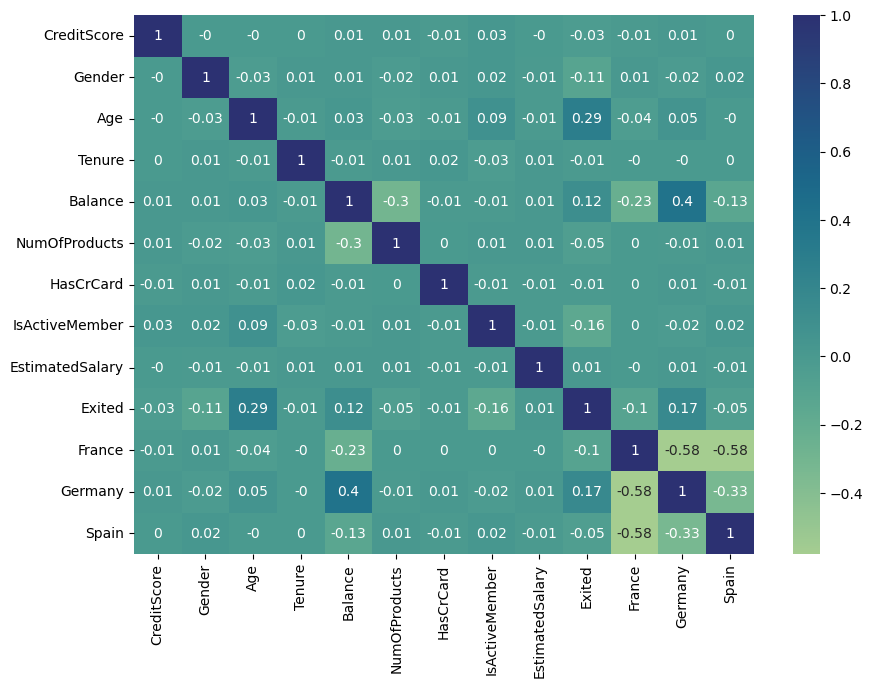

In [118]:
# importing seabon and matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
#plotting hearmap
plt.figure(figsize=(10,7))
sb.heatmap(data.corr().round(2),
           cmap='crest',
          annot=True)

* nothing substantial found from heatmap

## Splitting data

In [119]:
#importing train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(data[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'France', 'Germany', 'Spain']],
                                                 data[['Exited']],
                                                 test_size=0.2,
                                                 random_state=1)

In [120]:
x_train.shape

(8000, 12)

In [121]:
x_test.shape

(2000, 12)

In [122]:
y_test.shape

(2000, 1)

In [123]:
y_train.shape

(8000, 1)

## Model building using Deep Learing

In [124]:


# building model and adding layers to Neural network
model=tk.Sequential([
    tk.layers.Dense(250, input_shape=(12,),activation='relu'),
    tk.layers.Dense(100, activation='relu'),
    tk.layers.Dense(10, activation='relu'),
    tk.layers.Dense(1, activation='sigmoid')
])

#

tb_callback=tk.callbacks.TensorBoard(log_dir='D:/MBA RAJESH D/projects internships/projects/DeepLearning/bank_churn/tensorboard_graphs'+'/without_balance',
                                    histogram_freq=1)
model.compile(optimizer='adam',
            loss='binary_crossentropy',
              metrics=['accuracy'])

# fitting data
model.fit(x_train,y_train, epochs=100,callbacks=[tb_callback])


Epoch 1/100
250/250 [==============================] - 3s 5ms/step - loss: 0.4642 - accuracy: 0.8015
Epoch 2/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4135 - accuracy: 0.8251
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3744 - accuracy: 0.8461
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3593 - accuracy: 0.8533
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3556 - accuracy: 0.8516
Epoch 6/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3504 - accuracy: 0.8556
Epoch 7/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3447 - accuracy: 0.8619
Epoch 8/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3442 - accuracy: 0.8566
Epoch 9/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3410 - accuracy: 0.8572
Epoch 10/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3371 - accura

* model is trained with an accuracy of 93%

In [125]:
model.evaluate(x_train,y_train)

250/250 [==============================] - 1s 4ms/step - loss: 0.1471 - accuracy: 0.9370


[0.14711472392082214, 0.9369999766349792]

* on training data, accuracy is 93%

In [126]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 1s 4ms/step - loss: 0.6392 - accuracy: 0.8275


[0.6391541361808777, 0.8274999856948853]

* when model is evaluated with test data, accuracy is around 83%
* seems model is suffering from imbalanced data

In [127]:
# predicting
yp=model.predict(x_test)

63/63 [==============================] - 0s 3ms/step


In [128]:
yp[:3]

array([[0.00528832],
       [0.09837729],
       [0.00319811]], dtype=float32)

* predictions are not in format of 0,1

In [129]:
#converting into format of 0,1
y_pred=[]
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [130]:
y_pred[:100]

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

## Model evaluation


In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1585
           1       0.61      0.48      0.54       415

    accuracy                           0.83      2000
   macro avg       0.74      0.70      0.72      2000
weighted avg       0.82      0.83      0.82      2000



* model seems to be suffering from imbalance and underfitting

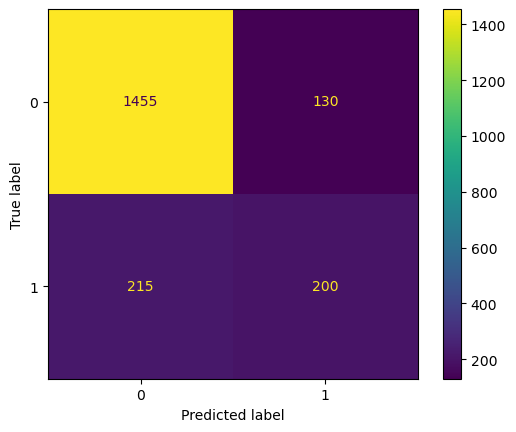

In [132]:
# getting confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,
                                       y_pred)


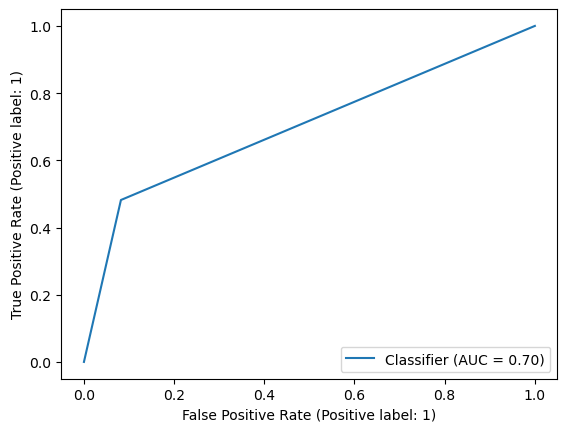

In [133]:
# getting RUC curve
RocCurveDisplay.from_predictions(y_test,y_pred)

## Handling Imbalance

In [134]:
# separating columns in x_label and y_label for simplicity
cols_in_xlabel=['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'France', 'Germany', 'Spain']
cols_in_ylabel=['Exited']

In [135]:
# creating function for deep learning model including train_test_split

def deeplearningModel(data,tensorboard_path,epoch):
    
        x_train,x_test,y_train, y_test = train_test_split(data[cols_in_xlabel],
                                                 data[cols_in_ylabel],
                                                 test_size=0.2,
                                                 random_state=1,
                                                  stratify=data[cols_in_ylabel]
                                                )
        # building model and adding layers to Neural network
        model=tk.Sequential([
        tk.layers.Dense(250, input_shape=(12,),activation='relu'),
        tk.layers.Dense(100, activation='relu'),
        tk.layers.Dense(10, activation='relu'),
        tk.layers.Dense(1, activation='sigmoid')
        ])

          #printing x_test,y_test value counts
        print('y_train',y_train.value_counts(),'\n', 'y_test',y_test.value_counts())

        
        tb_callback=tk.callbacks.TensorBoard(log_dir='D:/MBA RAJESH D/projects internships/projects/DeepLearning/bank_churn/tensorboard_graphs'+'/'+tensorboard_path,
                                    histogram_freq=1)
        model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

        # fitting data
        model.fit(x_train,y_train, epochs=epoch,callbacks=[tb_callback])
        
        # predicting model
        yp=model.predict(x_test)
        
        # convering to 0 and 1 
        y_pred=[]
        for i in yp:
            if i > 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        RocCurveDisplay.from_predictions(y_test,y_pred)
                
        
        #printing classification report
        print(classification_report(y_test,y_pred))


### Undersampling method

In [136]:
#checking size of each category in exited column
print(data[data['Exited']==0].shape)
data[data['Exited']==1].shape

(7963, 13)


(2037, 13)

In [137]:
# separating data into 0 and 1
df_class0=data[data['Exited']==0]
df_class1=data[data['Exited']==1]

In [138]:
#undersampling
os_df=df_class0.sample(2037)
os_df.shape

(2037, 13)

In [139]:
# concatenating undersampling dataframe
df_undersampling=pd.concat([df_class1,os_df],axis=0)
df_undersampling.shape

(4074, 13)

y_train Exited
0         1630
1         1629
dtype: int64 
 y_test Exited
1         408
0         407
dtype: int64
Epoch 1/100
102/102 [==============================] - 3s 7ms/step - loss: 0.6380 - accuracy: 0.6471
Epoch 2/100
102/102 [==============================] - 1s 7ms/step - loss: 0.5889 - accuracy: 0.6950
Epoch 3/100
102/102 [==============================] - 1s 8ms/step - loss: 0.5590 - accuracy: 0.7202
Epoch 4/100
102/102 [==============================] - 1s 7ms/step - loss: 0.5286 - accuracy: 0.7398
Epoch 5/100
102/102 [==============================] - 1s 7ms/step - loss: 0.4978 - accuracy: 0.7634
Epoch 6/100
102/102 [==============================] - 1s 7ms/step - loss: 0.4870 - accuracy: 0.7607
Epoch 7/100
102/102 [==============================] - 1s 7ms/step - loss: 0.4782 - accuracy: 0.7754
Epoch 8/100
102/102 [==============================] - 1s 7ms/step - loss: 0.4730 - accuracy: 0.7739
Epoch 9/100
102/102 [==============================] - 1s 7ms/step - loss: 0.

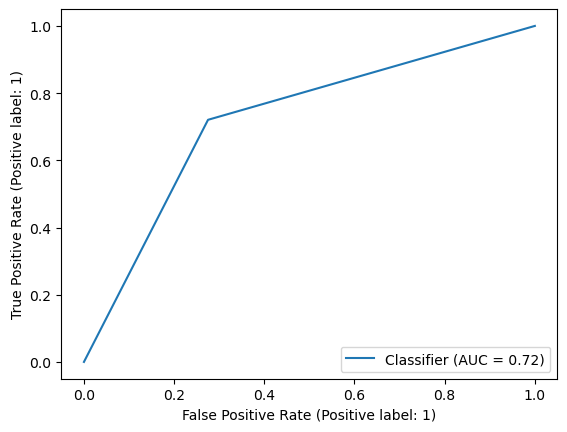

In [140]:
## calling deeplearningmodel

deeplearningModel(data=df_undersampling,
                 tensorboard_path='underSampling',
                 epoch=100)

### Oversampling method

In [141]:
#checking size of each category in exited column
print(data[data['Exited']==0].shape)
data[data['Exited']==1].shape

(7963, 13)


(2037, 13)

In [142]:
# separating data into 0 and 1
df_class0=data[data['Exited']==0]
df_class1=data[data['Exited']==1]

In [143]:
#oversampling
os_df=df_class1.sample(7963,replace=True)
os_df.shape

(7963, 13)

In [144]:
# concatenating oversampling dataframe
df_oversampling=pd.concat([df_class0,os_df],axis=0)
df_oversampling.shape

(15926, 13)

y_train Exited
0         6370
1         6370
dtype: int64 
 y_test Exited
0         1593
1         1593
dtype: int64
Epoch 1/100
399/399 [==============================] - 5s 5ms/step - loss: 0.5846 - accuracy: 0.6911
Epoch 2/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4898 - accuracy: 0.7619
Epoch 3/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4683 - accuracy: 0.7721
Epoch 4/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4591 - accuracy: 0.7809
Epoch 5/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4514 - accuracy: 0.7810
Epoch 6/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4424 - accuracy: 0.7890
Epoch 7/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4373 - accuracy: 0.7938
Epoch 8/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4324 - accuracy: 0.7949
Epoch 9/100
399/399 [==============================] - 2s 5ms/step - loss: 

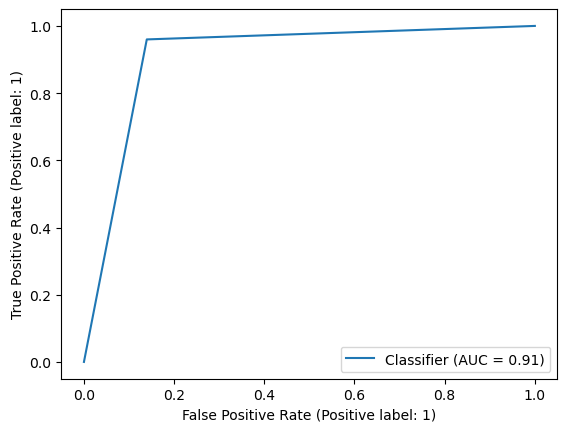

In [145]:
# building deeplearningmodel with oversampling
deeplearningModel(data=df_oversampling,
                  tensorboard_path='overSampling',
                  epoch=100)

### using SMOTE approach

In [146]:
# importing SMOTE
from imblearn.over_sampling import SMOTE
# creating object for smote
smote=SMOTE(sampling_strategy='minority')

In [147]:
# using smote approach
x_label,y_label=smote.fit_resample(data[cols_in_xlabel],data[cols_in_ylabel])

In [148]:
# cancatenating x_label and y_label
df_smote=pd.concat([x_label,y_label],axis=1)
df_smote

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Exited
0,0.538000,0,0.324324,0.200000,0.000000,0.000000,1,1,0.506735,1,0,0,1
1,0.516000,0,0.310811,0.100000,0.334031,0.000000,0,1,0.562709,0,0,1,0
2,0.304000,0,0.324324,0.800000,0.636357,0.666667,1,0,0.569654,1,0,0,1
3,0.698000,0,0.283784,0.100000,0.000000,0.333333,0,0,0.469120,1,0,0,0
4,1.000000,0,0.337838,0.200000,0.500246,0.000000,1,1,0.395400,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,0.637176,0,0.632299,0.098092,0.005941,0.000000,1,1,0.885999,0,0,1,1
15922,0.608939,1,0.398749,0.599669,0.475076,0.000000,0,1,0.097427,0,0,1,1
15923,0.637868,0,0.412340,0.235526,0.425498,0.000000,1,0,0.161250,1,0,0,1
15924,0.563669,0,0.380187,0.174803,0.589384,0.000000,1,1,0.730943,0,0,1,1


y_train Exited
0         6370
1         6370
dtype: int64 
 y_test Exited
0         1593
1         1593
dtype: int64
Epoch 1/100
399/399 [==============================] - 4s 5ms/step - loss: 0.5740 - accuracy: 0.7022
Epoch 2/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4830 - accuracy: 0.7664
Epoch 3/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4571 - accuracy: 0.7852
Epoch 4/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4435 - accuracy: 0.7896
Epoch 5/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4315 - accuracy: 0.7961
Epoch 6/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4280 - accuracy: 0.7990
Epoch 7/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4213 - accuracy: 0.8030
Epoch 8/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4152 - accuracy: 0.8075
Epoch 9/100
399/399 [==============================] - 2s 6ms/step - loss: 

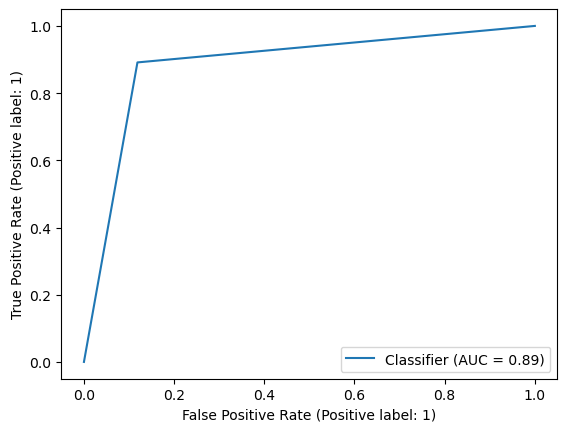

In [149]:
# building deeplearningmodel with smoteAapproach
deeplearningModel(data=df_smote,
                  tensorboard_path='smoteAapproach',
                  epoch=100)

## Conclusion

								
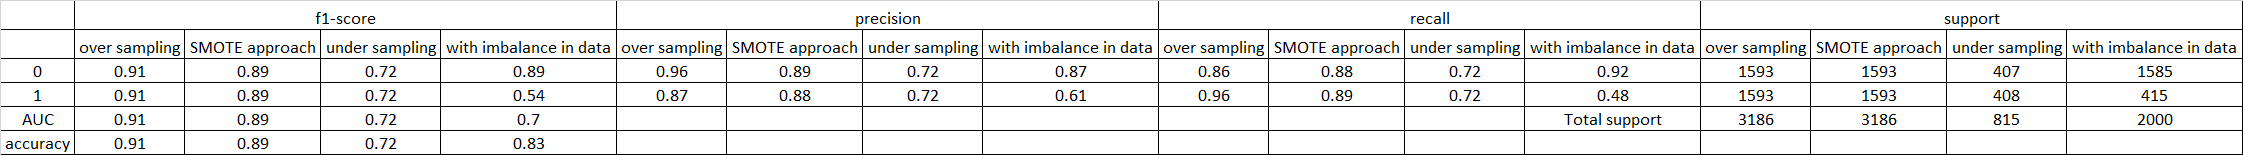

* On comparing metrics <br> ***Oversampling approach is considered as best one for the given problem,*** <br> <code>***as it has better accuracy, better AUC, better f1-score than other approaches***</code>